# **Data Science Project with Python**

In [4]:
import pandas as pd

In [8]:
df = pd.read_csv('customer_churn.csv')

In [ ]:
df.head(4)

# **A) Data Manipulation:**

**a.** Extract the 5th column & store it in ‘customer_5’

In [21]:
customer_5 = df.iloc[:,4]
customer_5.head(3)

0    No
1    No
2    No
Name: Dependents, dtype: object

**b.** Extract the 15th column & store it in ‘customer_15’

In [22]:
customer_15 = df.iloc[:,14]
customer_15.head(3)

0    No
1    No
2    No
Name: StreamingMovies, dtype: object

**c.** Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [20]:
senior_male_electronic = df[(df['SeniorCitizen'] == 1) & (df['gender'] == 'Male') & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No


**d.** Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’


In [23]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100 )]
customer_total_tenure.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


**e.** Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’


In [25]:
two_mail_yes = df[(df['Churn'] == 'Yes') & (df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check')]
two_mail_yes.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


**f.** Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’


In [28]:
customer_333 = df.sample(n = 333)

In [29]:
customer_333.shape

(333, 21)

**g.** Get the count of different levels from the ‘Churn’ column

In [30]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# **B) Data Visualization:**

In [31]:
import matplotlib.pyplot as plt

**a. Build a bar-plot for the ’InternetService’ column:**

**i.** Set x-axis label to ‘Categories of Internet Service’

**ii.** Set y-axis label to ‘Count of Categories’

**iii.** Set the title of plot to be ‘Distribution of Internet Service’

**iv.** Set the color of the bars to be ‘orange’

In [32]:
x = df['InternetService'].value_counts().keys()
y = df['InternetService'].value_counts().values

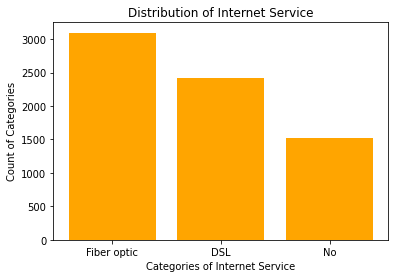

In [34]:
plt.bar(x,height = y,color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

**b. Build a histogram for the ‘tenure’ column:**


**i.** Set the number of bins to be 30

**ii.**Set the color of the bins to be ‘green’

**iii.** Assign the title ‘Distribution of tenure’

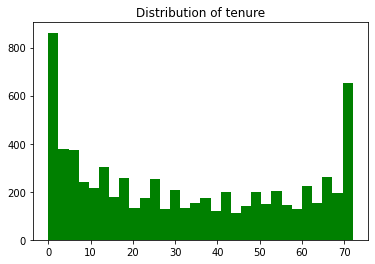

In [37]:
plt.hist(df['tenure'],bins = 30,color='green')
plt.title('Distribution of tenure')
plt.show()

**c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:**


**i.** Assign the points a color of ‘brown’

**ii.** Set the x-axis label to ‘Tenure of customer’

**iii.** Set the y-axis label to ‘Monthly Charges of customer’

**iv.** Set the title to ‘Tenure vs Monthly Charges’

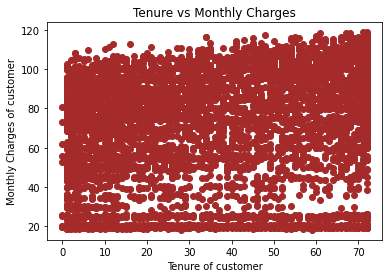

In [38]:
plt.scatter(df['tenure'],df['MonthlyCharges'],color ='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

**d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.**

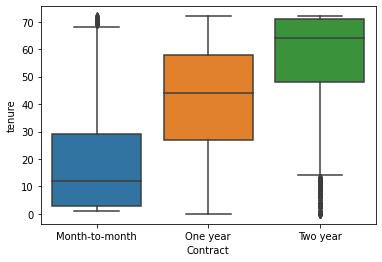

In [40]:
import seaborn as sns
sns.boxplot(x = df['Contract'], y = df['tenure'])
plt.show()

# **C) Linear Regression:**

**a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’**


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

**i.** Divide the dataset into train and test sets in 70:30 ratio.


In [42]:
X = df['tenure'].values.reshape(-1,1)
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**ii.** Build the model on train set and predict the values on test set


In [43]:
lr = LinearRegression().fit(X_train, y_train)

**iii.** After predicting the values, find the root mean square error


In [48]:
y_pred = lr.predict(X_test)
y_pred

array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514])

**iv.** Find out the error in prediction & store the result in ‘error’


In [47]:
error = y_pred - y_test
error

185     30.306590
2715    42.185209
3825    51.475579
1807   -21.243410
132     24.898812
          ...    
5522   -15.043410
6377    10.456590
5500    12.791303
2392   -29.737316
6705    10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64

**v.** Find the root mean square error

In [53]:
np.sqrt(((error) ** 2).mean())

29.07936015646816

# **D) Logistic Regression:**

**a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

  **i.** Divide the dataset in 65:35 ratio

In [56]:
X = df['MonthlyCharges'].values.reshape(-1,1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

**ii.** Build the model on train set and predict the values on test set


In [58]:
logr = LogisticRegression().fit(X_train, y_train)

**iii.** Build the confusion matrix and get the accuracy score

In [59]:
y_pred = logr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1797    0]
 [ 669    0]]
0.7287104622871047


**b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’**


**i.** Divide the dataset in 80:20 ratio


In [60]:
X = df[['MonthlyCharges','tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**ii.** Build the model on train set and predict the values on test set


In [62]:
logrmulti = LogisticRegression().fit(X_train, y_train)

**iii.** Build the confusion matrix and get the accuracy score

In [64]:
y_pred = logrmulti.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[944  92]
 [193 180]]
0.7977288857345636


# **E) Decision Tree:**

**a. Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’**

In [65]:
from sklearn.tree import DecisionTreeClassifier

**i.** Divide the dataset in 80:20 ratio


In [66]:
X = df['tenure'].values.reshape(-1,1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**ii.** Build the model on train set and predict the values on test set


In [68]:
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**iii.** Build the confusion matrix and calculate the accuracy

In [69]:
y_pred = DTclf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[951  85]
 [257 116]]
0.7572746628814763


# **F) Random Forest:**

**a. Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’**


In [70]:
from sklearn.ensemble import RandomForestClassifier

**i.** Divide the dataset in 70:30 ratio


In [71]:
X = df[['MonthlyCharges','tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**ii.** Build the model on train set and predict the values on test set


In [72]:
RT = RandomForestClassifier()
RT.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**iii.** Build the confusion matrix and calculate the accuracy

In [73]:
y_pred = RT.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1332  207]
 [ 313  261]]
0.7539044013251301
